In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 

In [2]:
df = pd.read_csv("HeartFailure.csv")
df.head()

,ID,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 14)

In [4]:
df_cluster = df.iloc[:,1:13]
df_cluster.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [5]:
#OPTIC CLUSTERING with visualization

def optic_clustering(df,n,k):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): min number of point to form a cluster
        k(integer): Parameter for PCA
    """
    
    optics = OPTICS(min_samples = n).fit(df)

    
    pca = PCA(n_components=k)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    df['cluster'] = optics.labels_
    
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    return df,plot


array([ 0, -1,  1])

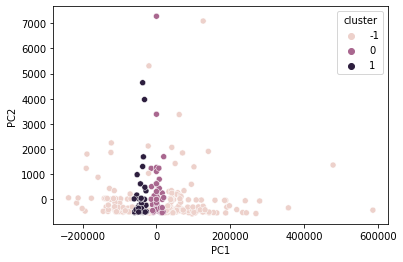

In [6]:
df_cluster_1, plot = optic_clustering(df_cluster,26,2)
df_cluster_1.head()
df_cluster_1.cluster.unique()